# Explainability applications

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from pathlib import Path

import seaborn as sns
sns.set_style("whitegrid")
import torch


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

__TO-DO__: Define your path to the project folder and ImageNet-S dataset here:

In [4]:
PROJ_PATH = []
DATASET_PATH = []

In [6]:
# Define paths
PROJ_PATH = Path(PROJ_PATH)
DATASET_PATH = Path(DATASET_PATH)
RES_PATH = PROJ_PATH / 'results'

In [7]:
# Get dataset info
from src.datasets.imagenet import ImagenetDatasetS

dataset = ImagenetDatasetS(DATASET_PATH)
stim_info = dataset.stim_info

## Visualization

### ViT-B/32

#### Head-specific visualization

In [10]:
from src.plots.explainability import plot_specific_ft_importance

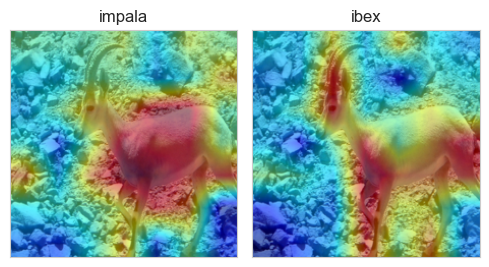

In [11]:
# Select model parameters
model_name = 'vit_b_32'
b = 7  # block index
h = 0  # head index

# Select different classes
imgs_info = [['n02422699', 0, 352], ['n02422699', 0, 350]]

plot_specific_ft_importance(model_name, b, h, imgs_info, stim_info, PROJ_PATH, DATASET_PATH)

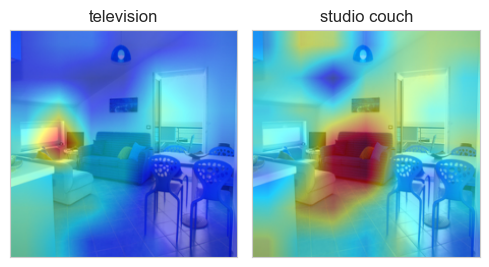

In [12]:
# Select model parameters
model_name = 'vit_b_32'
b = 11  # block index
h = 6  # head index

# Select different classes
imgs_info = [['n04404412', 1, 851], ['n04404412', 1, 831]]

plot_specific_ft_importance(model_name, b, h, imgs_info, stim_info, PROJ_PATH, DATASET_PATH)

#### Sum over gradients

In [13]:
from src.plots.explainability import plot_sum_ft_importance

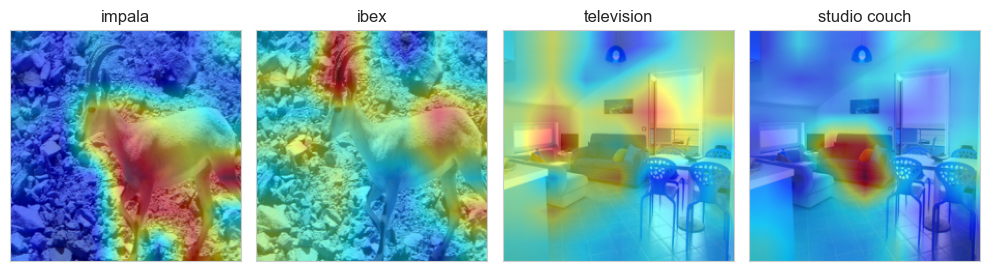

In [14]:
# Select some images and different classes
# [imagenet_class, imagenet_id, class_id]
imgs_info = [
    ['n02422699', 0, 352], ['n02422699', 0, 350],
    ['n04404412', 1, 851], ['n04404412', 1, 831],
]

plot_sum_ft_importance('vit_b_32', imgs_info, stim_info, PROJ_PATH, DATASET_PATH)

Visualize other examples:

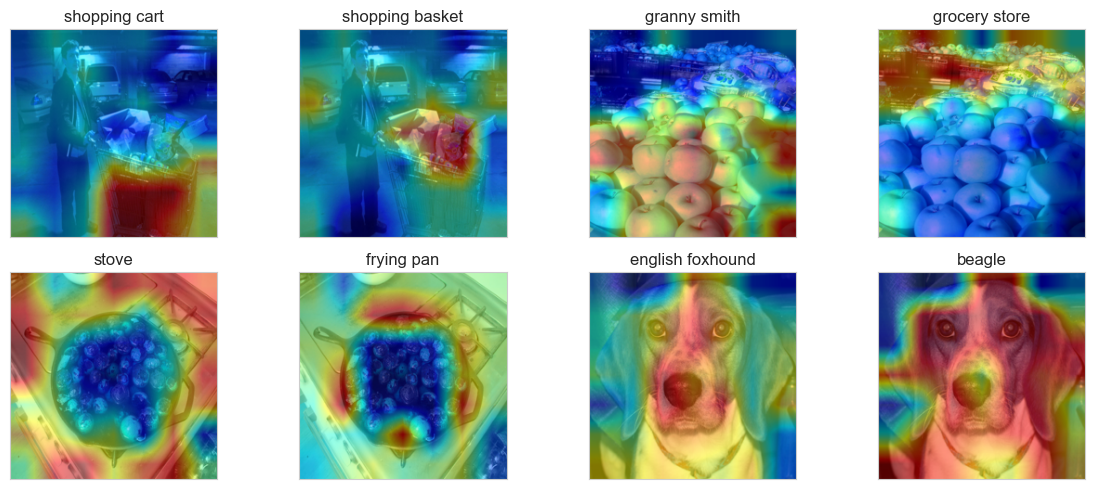

In [15]:
imgs_info = [
    ['n04204347', 1, 791], ['n04204347', 1, 790],
    ['n07742313', 0, 948], ['n07742313', 0, 582],
    ['n04330267', 3, 827], ['n04330267', 3, 567],
    ['n02089973', 0, 167], ['n02089973', 0, 162],
]

plot_sum_ft_importance('vit_b_32', imgs_info, stim_info, PROJ_PATH, DATASET_PATH)

### ViT-B/16

#### Sum over gradients

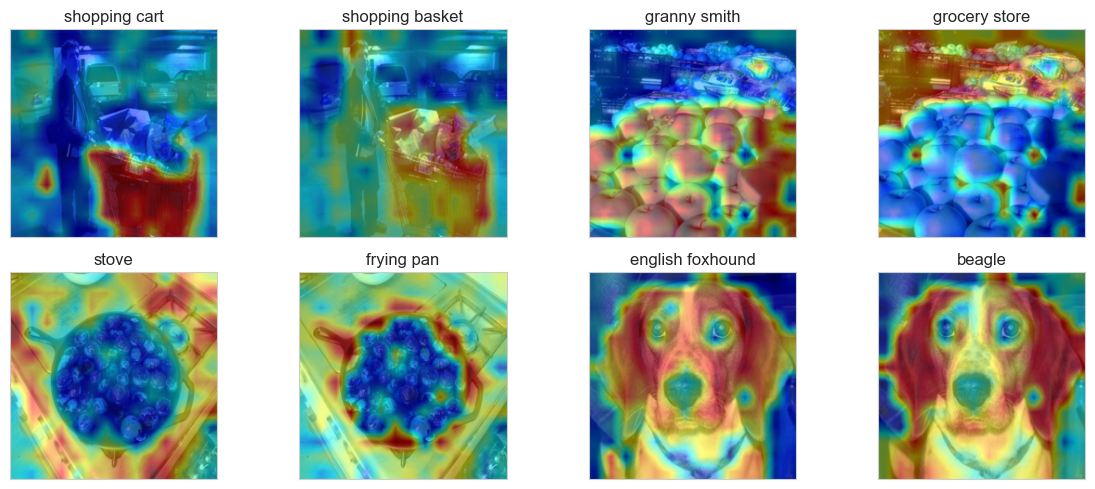

In [16]:
img_info = [
    ['n02422699', 0, 352], ['n02422699', 0, 350],
    ['n04404412', 1, 851], ['n04404412', 1, 831],
    ['n04204347', 1, 791], ['n04204347', 1, 790],
    ['n07742313', 0, 948], ['n07742313', 0, 582],
    ['n04330267', 3, 827], ['n04330267', 3, 567],
    ['n02089973', 0, 167], ['n02089973', 0, 162],
]

plot_sum_ft_importance('vit_b_16', imgs_info, stim_info, PROJ_PATH, DATASET_PATH)

## Perturbation experiment

In [8]:
from src.plots.explainability import plot_perturbation

### Negative perturbation

AUC emb: 0.8362941079403841
AUC chefer: 0.8454036573533792
AUC random: 0.7158862672691159


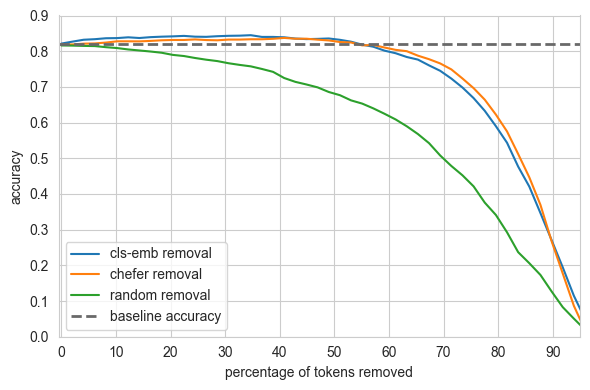

In [9]:
plot_perturbation('vit_b_32', 'negative', RES_PATH, random=True)

### Positive perturbation

AUC emb: 0.41281954233979434
AUC chefer: 0.39287127006033656
AUC random: 0.7158862672691159


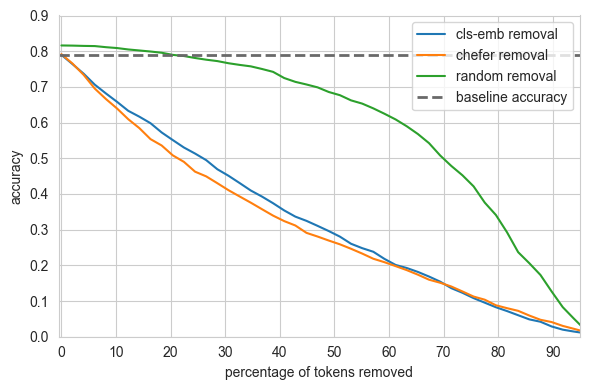

In [10]:
plot_perturbation('vit_b_32', 'positive', RES_PATH, random=True)